In [92]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========================
# 1. Leitura dos dados
# ========================

In [93]:

df = pd.read_csv('c://Users//lucin//Downloads//titanic_synthetic.csv')


# ========================
# 2. Análise Exploratória
# ========================


# Features

In [94]:
df.head(1)

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,16.2,0,0,33.61,S,1


In [95]:
df.shape 

(600, 8)


# Distribuição da variável alvo

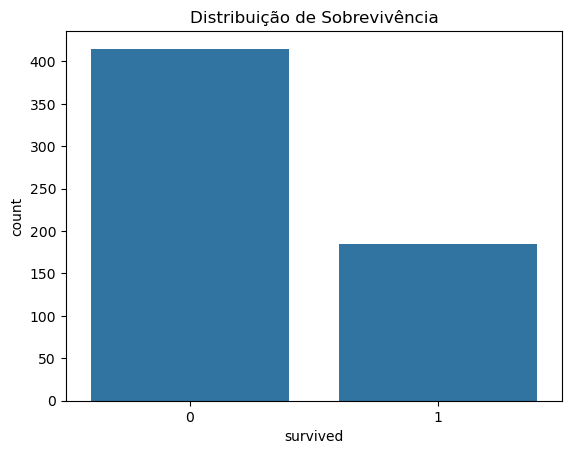

In [96]:

sns.countplot(x='survived', data=df)
plt.title("Distribuição de Sobrevivência")
plt.show()

# Distribuição da Idade

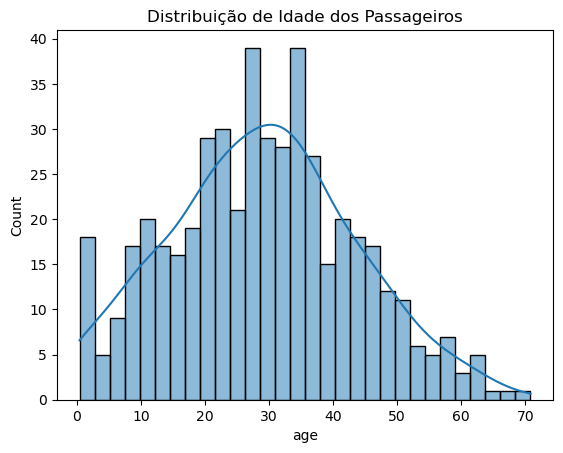

In [97]:

# Distribuição da Idade
sns.histplot(df['age'].dropna(), bins=30, kde=True)
plt.title("Distribuição de Idade dos Passageiros")
plt.show()


# Relação Idade x Sobrevivência

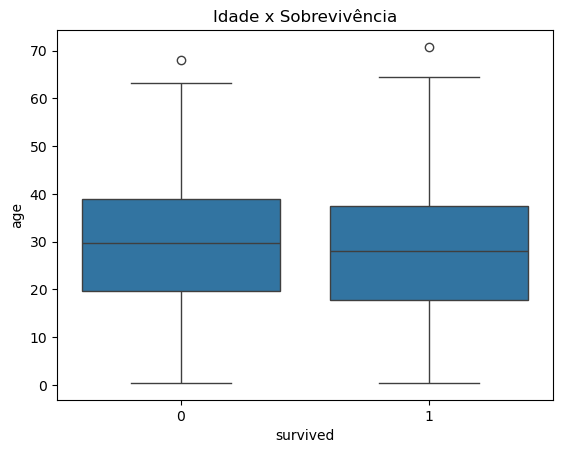

In [98]:

sns.boxplot(x='survived', y='age', data=df)
plt.title("Idade x Sobrevivência")
plt.show()

# Relação Sexo x Sobrevivência

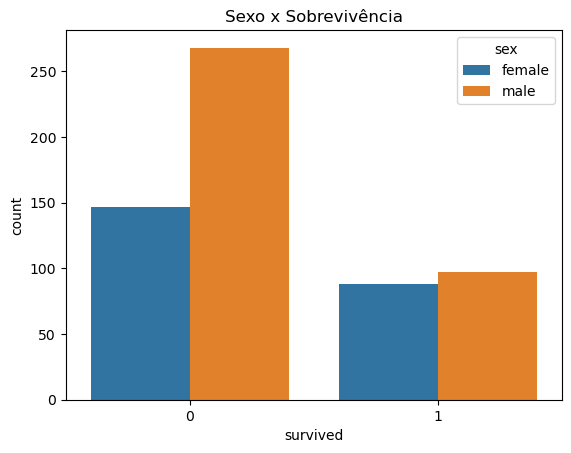

In [99]:

sns.countplot(x='survived', hue='sex', data=df)
plt.title("Sexo x Sobrevivência")
plt.show()


# Relação Classe x Sobrevivência

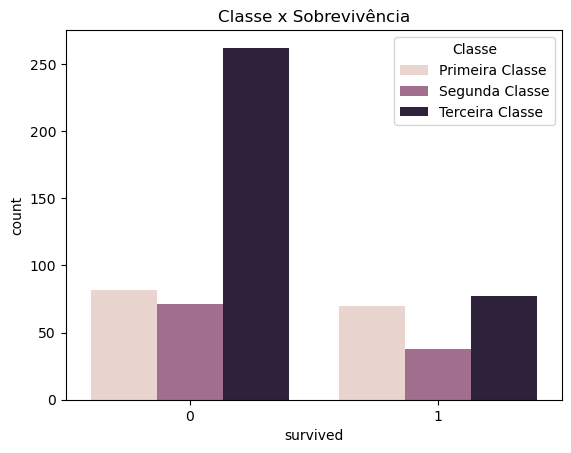

In [100]:

sns.countplot(x='survived', hue='pclass', data=df)
plt.title("Classe x Sobrevivência")
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
plt.legend(handles, labels, title='Classe')
plt.show()


# Relação Porto de Embarque x Sobrevivência

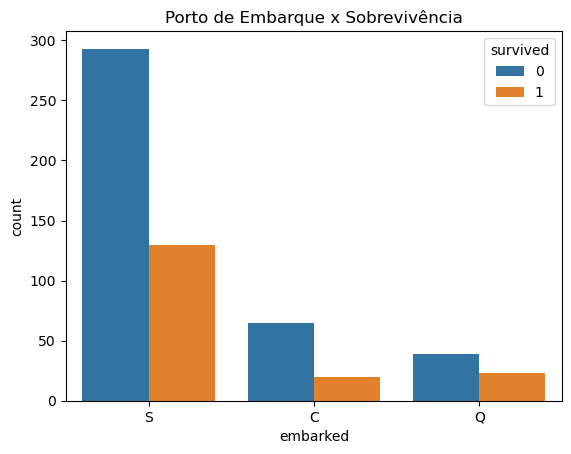

In [101]:

sns.countplot(x='embarked', hue='survived', data=df)
plt.title("Porto de Embarque x Sobrevivência")
plt.show()



# ========================
# 3. Pré-processamento
# ========================


In [ ]:

# Preencher valores ausentes
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Converter variáveis categóricas
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)

KeyError: 'embarked'


# ========================
# 4. Visualização (Histograma das principais features)
# ========================

In [103]:

features = ['pclass', 'sex', 'age', 'fare', 'embarked']
df[features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuição das Variáveis Selecionadas")
plt.show()


KeyError: "['embarked'] not in index"


# ========================
# 5. Correlação
# ========================

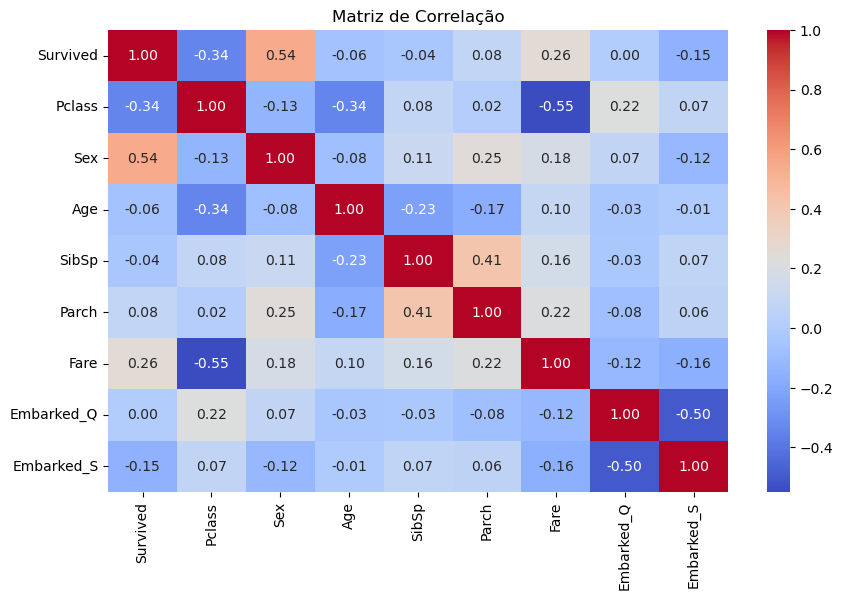

In [ ]:

plt.figure(figsize=(10, 6))
correlacao = df.corr(numeric_only=True)
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


# Dados após o tratamento

In [ ]:
df[features].head(10)

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,7.2500,False,True
1,1,1,38.0,71.2833,False,False
2,3,1,26.0,7.9250,False,True
3,1,1,35.0,53.1000,False,True
4,3,0,35.0,8.0500,False,True
5,3,0,28.0,8.4583,True,False
6,1,0,54.0,51.8625,False,True
7,3,0,2.0,21.0750,False,True
8,3,1,27.0,11.1333,False,True
9,2,1,14.0,30.0708,False,False



# ========================
# 6. Modelagem
# ========================

In [ ]:

# Features e alvo
X = df[features]
y = df['Survived']

# Divisão treino/teste


# Modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train,y_train)

# Previsões e avaliação
y_pred = modelo.predict(X_test)


print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

# Matriz de confusão

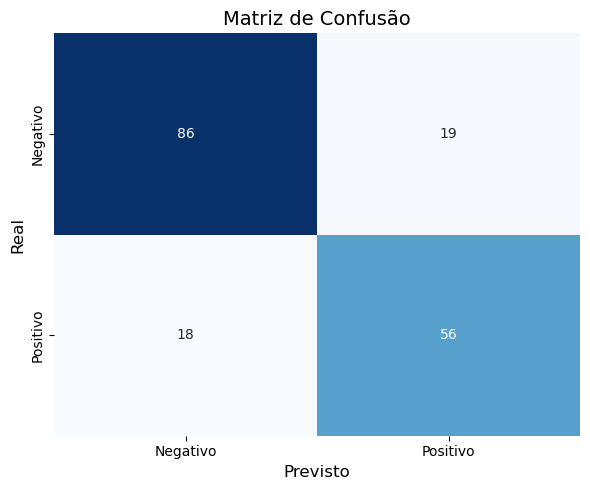

In [ ]:

cm = confusion_matrix(y_test, y_predA)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])

plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.title('Matriz de Confusão', fontsize=14)
plt.tight_layout()
plt.show()